In [1]:
import os

import pandas as pd
import numpy as np

from scipy.io import netcdf

In [2]:
DATA_FILE_DIR = './data/'

START_YEAR, END_YEAR = 2011, 2020

NUM_OF_YEARS = END_YEAR - START_YEAR

NUM_OF_MONTHS = 12

NUM_OF_DAYS = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31,}

In [3]:
def get_min_tmp(filename):
    file = netcdf.netcdf_file(filename, mmap=False)
    tmp = file.variables['T_MIN_L103_Pd'].data
    min_tmp = np.ndarray(tmp.shape[1:])

    for i in range(tmp.shape[1]):
        for j in range(tmp.shape[2]):
            min_tmp[i, j] = min(tmp[0, i, j], tmp[1, i, j], tmp[2, i, j], tmp[3, i, j])
    
    file.close()
    return min_tmp

In [27]:
yearly_date_avg = {}
for month in range(1, NUM_OF_MONTHS+1, 1):
    for day in range(1, NUM_OF_DAYS[month]+1, 1):
        date_tmps = np.zeros((NUM_OF_YEARS, 151, 361))
        
        if month < 4: # if month<4, data is from 2011 to 2020
            for year in range(START_YEAR+1, END_YEAR+1):
                filename = DATA_FILE_DIR + '{}{:02d}{:02d}.nc'.format(year, month, day)
                assert os.path.isfile(filename), "File Not Found: '{}'".format(filename)
                date_tmps[year-START_YEAR-1] = get_min_tmp(filename)
        else: # if month>=4, data are from 2011 to 2019
            for year in range(START_YEAR, END_YEAR):
                filename = DATA_FILE_DIR + '{}{:02d}{:02d}.nc'.format(year, month, day)
                assert os.path.isfile(filename), "File Not Found: '{}'".format(filename)
                date_tmps[year-START_YEAR] = get_min_tmp(filename)
        
        yearly_date_avg['{:02d}{:02d}'.format(month, day)] = date_tmps.mean(axis=0)

In [28]:
yearly_date_avg

{'0101': array([[244.23333401, 244.23333401, 244.23333401, ..., 244.23333401,
         244.23333401, 244.23333401],
        [244.81110975, 244.86666701, 244.88888889, ..., 244.79999966,
         244.81110975, 244.81110975],
        [244.84444512, 244.83333333, 244.83333333, ..., 244.91111247,
         244.8777788 , 244.84444512],
        ...,
        [279.41110908, 279.38888889, 279.37778049, ..., 279.19999525,
         279.33333333, 279.41110908],
        [278.81111654, 278.64444648, 278.40000068, ..., 278.68889364,
         278.80000136, 278.81111654],
        [277.97777303, 277.65555488, 277.40000068, ..., 278.12222629,
         278.07777235, 277.97777303]]),
 '0102': array([[241.85555522, 241.85555522, 241.85555522, ..., 241.85555522,
         241.85555522, 241.85555522],
        [242.11111111, 242.13333299, 242.14444478, ..., 242.08889092,
         242.07777913, 242.11111111],
        [243.54444207, 243.51111179, 243.5       , ..., 243.53333367,
         243.56666565, 243.54444207

In [81]:
df = pd.DataFrame(columns=['lat', 'lon']+list(yearly_date_avg))

In [82]:
filename = DATA_FILE_DIR + '{}{:02d}{:02d}.nc'.format(year, month, day)
file = netcdf.netcdf_file(filename, mmap=False)
lat = file.variables['lat'].data
lon = file.variables['lon'].data

In [83]:
lat.copy()

array([ 90.,  89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,
        79.,  78.,  77.,  76.,  75.,  74.,  73.,  72.,  71.,  70.,  69.,
        68.,  67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,
        57.,  56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,
        46.,  45.,  44.,  43.,  42.,  41.,  40.,  39.,  38.,  37.,  36.,
        35.,  34.,  33.,  32.,  31.,  30.,  29.,  28.,  27.,  26.,  25.,
        24.,  23.,  22.,  21.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,
        13.,  12.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,
         2.,   1.,   0.,  -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,
        -9., -10., -11., -12., -13., -14., -15., -16., -17., -18., -19.,
       -20., -21., -22., -23., -24., -25., -26., -27., -28., -29., -30.,
       -31., -32., -33., -34., -35., -36., -37., -38., -39., -40., -41.,
       -42., -43., -44., -45., -46., -47., -48., -49., -50., -51., -52.,
       -53., -54., -55., -56., -57., -58., -59., -6

In [87]:
df['lat'] = 1

In [89]:
df['lon'] = lon.copy()

ValueError: Length of values does not match length of index

In [95]:
yearly_date_avg['0101'].shape

(151, 361)

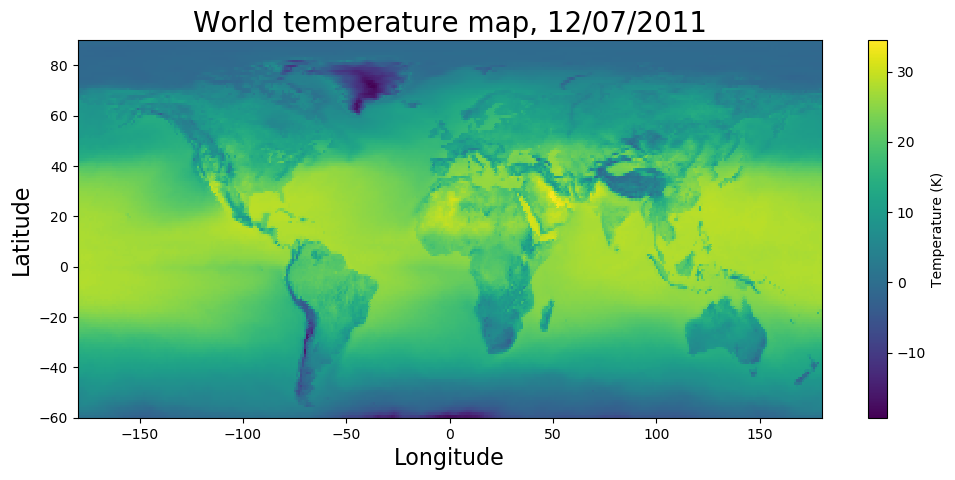

In [105]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 5), dpi=100)
heatmap = ax.pcolormesh(lon, lat, yearly_date_avg['0731']-273.15)
ax.set_title('World temperature map, 12/07/2011', size=20)
ax.set_xlabel('Longitude', size=16)
ax.set_ylabel('Latitude', size=16)
fig.colorbar(heatmap, label='Temperature (K)')

In [90]:
fig = go.Figure(data=go.Scattergeo(
        lon = lon,
        lat = lat,
        mode = 'markers',
        text = df['text'],
        marker_color = yearly_date_avg['0101'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='world',
    )
fig.show()

In [93]:
import plotly.graph_objects as go

import pandas as pd


fig = go.Figure(data=go.Scattergeo(
        fillcolor = 'r',
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='world',
    )
fig.show()

KeyError: 'long'

In [51]:
df

,iata,airport,city,state,country,lat,long,cnt,text
0,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464,25129,"Chicago O'Hare InternationalChicago, ILArrival..."
1,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,21925,"William B Hartsfield-Atlanta IntlAtlanta, GAAr..."
2,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200,20662,Dallas-Fort Worth InternationalDallas-Fort Wor...
3,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056,17290,"Phoenix Sky Harbor InternationalPhoenix, AZArr..."
4,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002,13781,"Denver IntlDenver, COArrivals: 13781"
...,...,...,...,...,...,...,...,...,...
216,EAU,Chippewa Valley Regional,Eau Claire,WI,USA,44.865257,-91.485072,48,"Chippewa Valley RegionalEau Claire, WIArrivals..."
217,DBQ,Dubuque Municipal,Dubuque,IA,USA,42.402959,-90.709167,48,"Dubuque MunicipalDubuque, IAArrivals: 48"
218,RST,Rochester International,Rochester,MN,USA,43.908826,-92.497987,37,"Rochester InternationalRochester, MNArrivals: 37"
219,UTM,Tunica Municipal Airport,Tunica,MS,USA,34.681499,-90.348816,32,"Tunica Municipal AirportTunica, MSArrivals: 32"
